# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 4th math score

How many years of data are logged in our dataset? 

In [4]:
max(df["YEAR"]) - min(df["YEAR"])

29

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [5]:
df_ = df.set_index('STATE')
if df_.loc['MICHIGAN']['AVG_MATH_4_SCORE'].mean() > df_.loc['OHIO']['AVG_MATH_4_SCORE'].mean():
    print("Michigan has the higher average outcome")
if df_.loc['MICHIGAN']['AVG_MATH_4_SCORE'].mean() < df_.loc['OHIO']['AVG_MATH_4_SCORE'].mean():
    print("Ohio has the higher average outcome")

Ohio has the higher average outcome


Find the average for your outcome score across all states in 2019

Text(0.5, 1.0, '4th Grade Math Score Over Time')

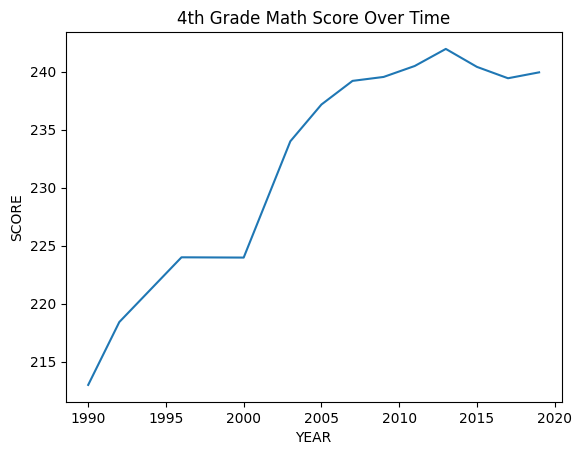

In [37]:
df.groupby('YEAR')["AVG_MATH_4_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('4th Grade Math Score Over Time')

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [10]:
df.groupby(["AVG_MATH_4_SCORE"]).max()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
AVG_MATH_4_SCORE,,,,,,,,,,,,,,,,,,,,,
192.0,2000_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2000,70762.0,881423.0,184825.0,0.0,696598.0,858807.0,318260.0,...,5357.0,5830.0,3371.0,2785.0,41330.0,13781.0,68925.0,235.0,NaN,NaN
193.0,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,6667.0,5832.0,5000.0,3433.0,NaN,NaN,80937.0,235.0,188.0,NaN
202.0,1992_MISSISSIPPI,MISSISSIPPI,1992,NaN,1684706.0,277706.0,901199.0,505801.0,1691990.0,956104.0,...,36423.0,39839.0,38132.0,26328.0,NaN,NaN,506668.0,246.0,199.0,NaN
204.0,1992_LOUISIANA,LOUISIANA,1992,NaN,3341253.0,367822.0,1848734.0,1124697.0,3362853.0,1888349.0,...,61244.0,61125.0,55942.0,38368.0,NaN,NaN,797985.0,250.0,204.0,NaN
205.0,2003_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2003,67522.0,1114061.0,152599.0,0.0,961462.0,1105963.0,473414.0,...,5659.0,5920.0,5158.0,2971.0,45706.0,16828.0,78057.0,243.0,188.0,239.0
208.0,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,261.0,207.0,NaN
210.0,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,256.0,211.0,NaN
211.0,2005_DISTRICT_OF_COLUMBIA,TENNESSEE,2005,499362.0,3080490.0,368830.0,1504225.0,1466538.0,3132516.0,1830264.0,...,64463.0,65195.0,63358.0,49639.0,315770.0,128171.0,855231.0,259.0,212.0,238.0
212.0,1992_SOUTH_CAROLINA,SOUTH_CAROLINA,1992,NaN,2842626.0,249903.0,1350148.0,1242575.0,2922293.0,1544232.0,...,44501.0,51081.0,49562.0,34615.0,NaN,NaN,640464.0,261.0,210.0,NaN


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [11]:
combining features, i think it would represent data better than the given data

SyntaxError: invalid syntax (1001468744.py, line 1)

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, '4th Grade Math Score Over Time')

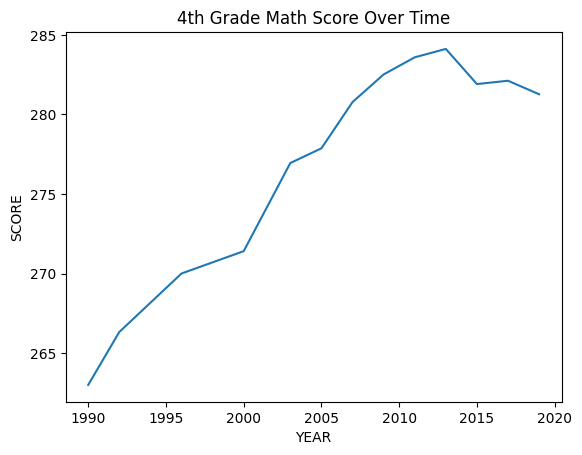

In [12]:
df.groupby('YEAR')["AVG_MATH_8_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('4th Grade Math Score Over Time')
#as the time goes on , the 4th grade reading score increased over time then decrease after 2011

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

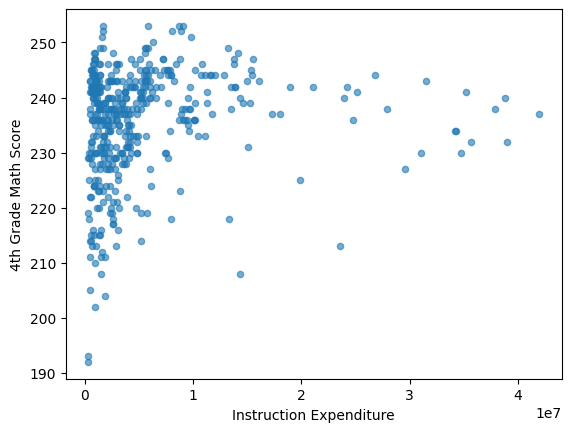

In [13]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure')
plt.ylabel('4th Grade Math Score')
#It shows that there as there is no relationship between instruction expenditure and 4th grade math score but most scores are located under instruction expenditure

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [14]:
from sklearn.model_selection import train_test_split

In [26]:
X = df[['GRADES_4_G','STATE_REVENUE','AVG_MATH_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [27]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
# create your model here
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [32]:
model.score(X_test, y_test)
np.mean(model.predict(X_test)-y_test)
np.mean(np.abs(model.predict(X_test)-y_test))
np.mean((model.predict(X_test)-y_test)**2)**0.5
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

0.8422238968641406
0.455129139139893
3.3371840138694933
4.251495708618268


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

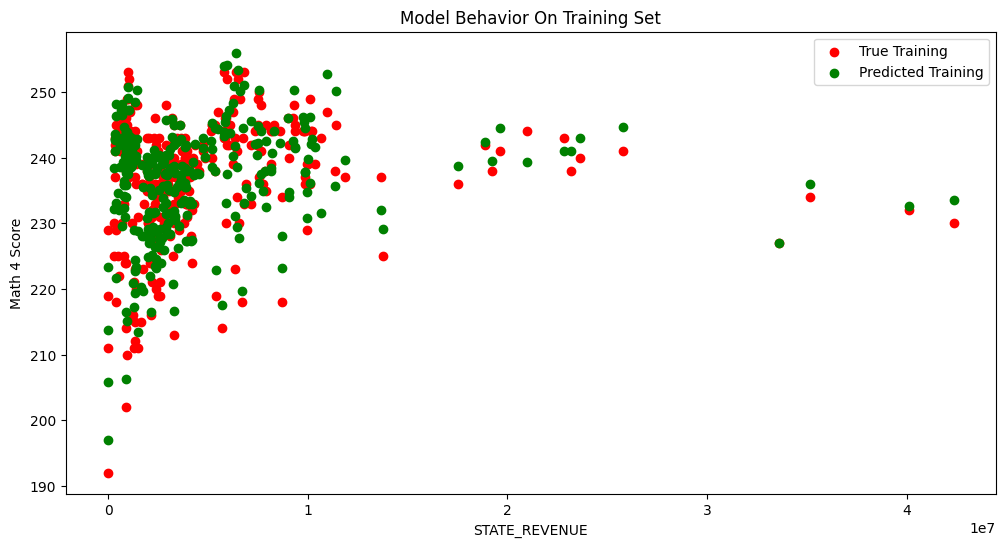

In [33]:
col_name = 'STATE_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

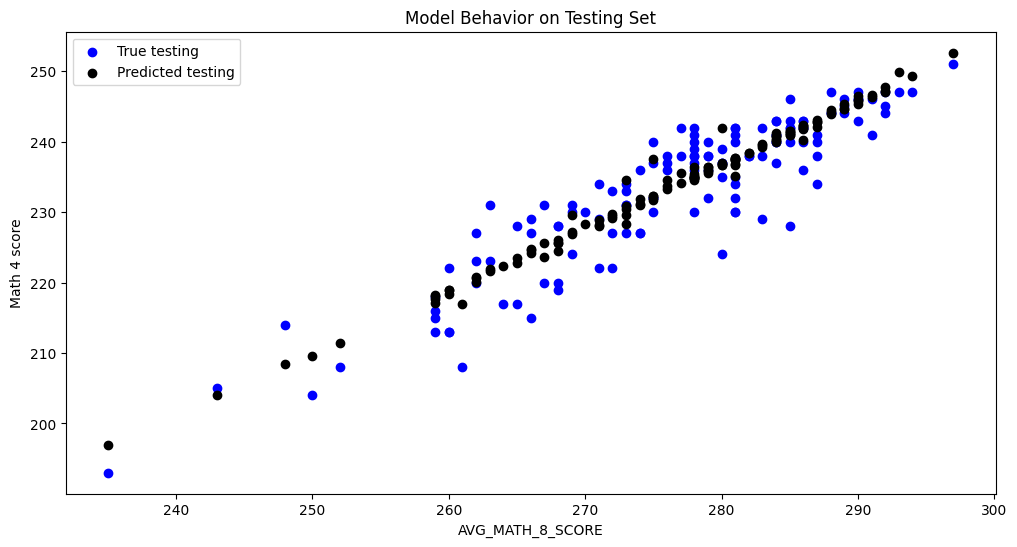

In [36]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

I wanted to analyze the 4th grade math score. Looking at this graph, it seems like that the model works too well on the training set because they line up perfectly on the graph linearly. 